In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from matplotlib.colors import ListedColormap

/var/folders/jx/39f5v9_1541c0j_2vb0z_b_w0000gn/T/ipykernel_37716/354025944.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], s=30, cmap='viridis')


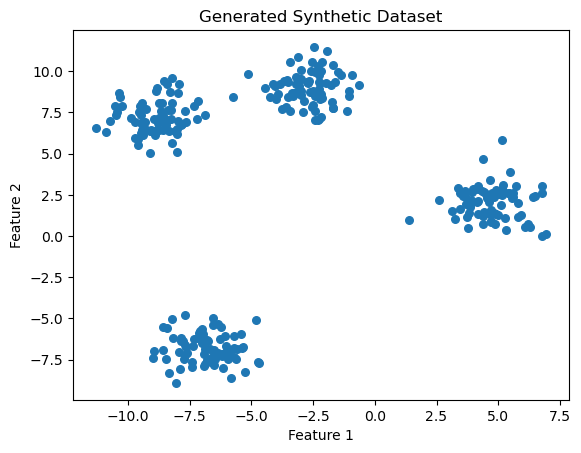

In [ ]:
# Generate a synthetic dataset with three clusters
data, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0, n_features=2)

# Visualize the dataset
plt.scatter(data[:, 0], data[:, 1], s=30, cmap='viridis')
plt.title("Generated Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


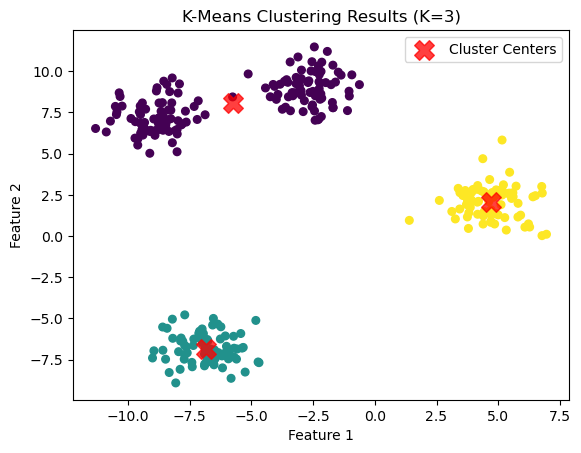

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(data)

# Visualize the clustering results
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')
plt.title(f"K-Means Clustering Results (K={3})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**Elbow Method**

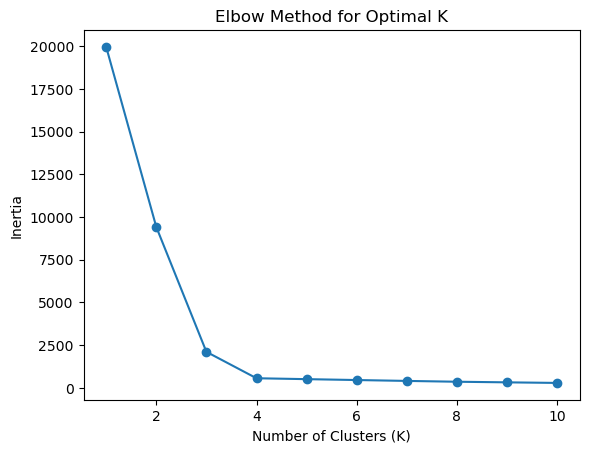

In [ ]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Elbow Method to find the optimal number of clusters (K)
inertia = []
for k in range(1, 11): # [1,2,3......,10]
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


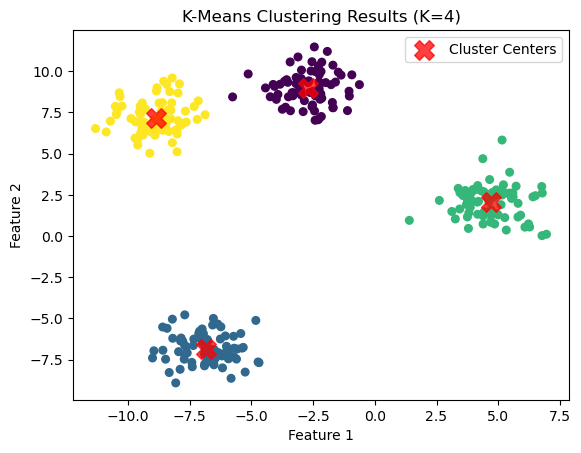

In [ ]:
# Apply k-means clustering with the optimal K
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
predicted_labels = kmeans.fit_predict(data)

# Visualize the clustering results
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')
plt.title(f"K-Means Clustering Results (K={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**DBSCAN**

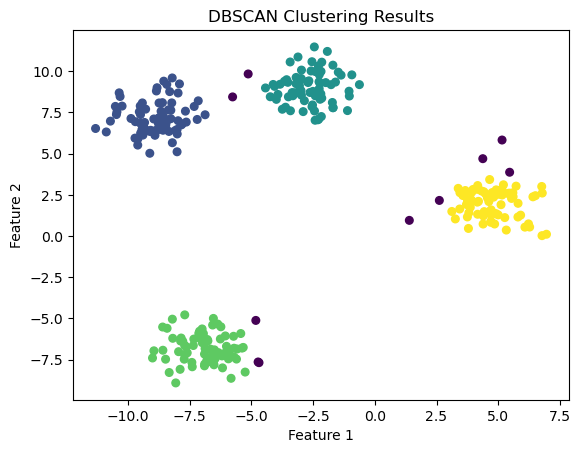

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=3)
predicted_labels = dbscan.fit_predict(data)

# Visualize the clustering results
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, s=30, cmap='viridis')
#plt.scatter(data[:, 0][predicted_labels != -1], data[:, 1][predicted_labels != -1], c=predicted_labels[predicted_labels != -1], s=30, cmap='viridis')

plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

/var/folders/jx/39f5v9_1541c0j_2vb0z_b_w0000gn/T/ipykernel_37716/20060037.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = ListedColormap(plt.cm.get_cmap('viridis', len(unique_labels)).colors)


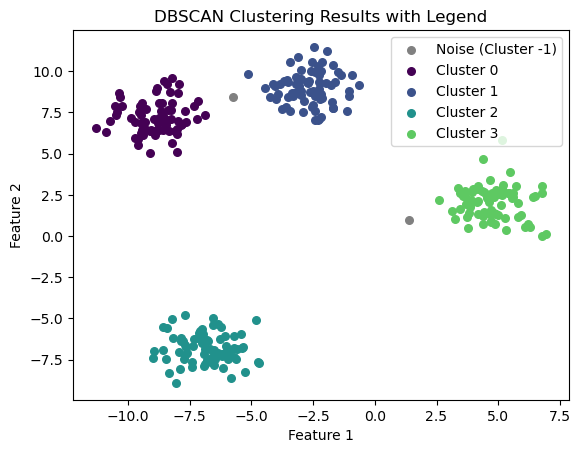

In [ ]:


# Apply DBSCAN clustering
#dbscan = DBSCAN(eps=0.8, min_samples=4)
dbscan = DBSCAN(eps=1.4, min_samples=2)
predicted_labels = dbscan.fit_predict(data)

# Get unique labels (including noise points)
unique_labels = np.unique(predicted_labels)

# Assign a unique color to each cluster
colors = ListedColormap(plt.cm.get_cmap('viridis', len(unique_labels)).colors)

# Visualize the clustering results with different colors for each cluster
for label in unique_labels:
    if label == -1:
        plt.scatter(data[predicted_labels == label, 0], data[predicted_labels == label, 1], color='gray', s=30, label=f'Noise (Cluster {label})')
    else:
        plt.scatter(data[predicted_labels == label, 0], data[predicted_labels == label, 1], c=[colors(label)], s=30, label=f'Cluster {label}')

# Add a legend
legend_labels = [f'Cluster {label}' if label != -1 else f'Noise (Cluster {label})' for label in unique_labels]
plt.legend(legend_labels, loc='upper right')

plt.title("DBSCAN Clustering Results with Legend")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Define the parameter grid
eps_values = np.linspace(0.1, 2.0, 20)
min_samples_values = range(2, 11)

# Initialize variables to store the best hyperparameters and corresponding silhouette score
best_eps = None
best_min_samples = None
best_silhouette_score = -1.0  # Initialize with a low value

# Grid search
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        predicted_labels = dbscan.fit_predict(data)

        # Exclude cases where all points are assigned to one cluster (not meaningful)
        if len(np.unique(predicted_labels)) > 1:
            silhouette = silhouette_score(data, predicted_labels)
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_samples = min_samples

# Print the best hyperparameters
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette_score}")

Best eps: 1.4
Best min_samples: 2
Best Silhouette Score: 0.7683435531805964
